<h2>Initialize part</h2>

In [1]:
import math 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/[1h]BTCUSDT.csv')
df2 = pd.read_csv('data/[1h]BTCUSDT.csv')
df_new = pd.read_csv('data/1hBTCUSDT_part_2.xls')

In [3]:
index = [x for x in range(0, len(df["Open"]))]

In [4]:
train_data = df["Close"]
check_data = df_new["Close"][0:200]

In [5]:
train_index = [x for x in range(len(train_data))]
check_index = [y+len(train_index) for y in range(len(check_data))]

In [6]:
number_of_predictions = len(check_data)

<h2>Ploting data</h2>

[]

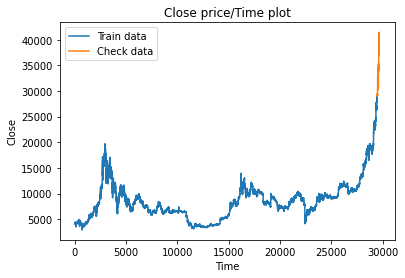

In [7]:
fig, ax = plt.subplots()
ax.plot(train_index, train_data, label="Train data")
ax.plot(check_index,check_data,label="Check data")
ax.set(xlabel='Time', ylabel='Close',
       title='Close price/Time plot')
ax.legend()
plt.plot()

[]

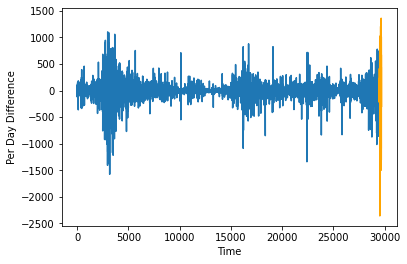

In [8]:
delta_day = []
delta_day2 = []
for i in range(len(train_data)):
    delta_day.append(df["Close"][i] - df["Open"][i])
for i in range(len(check_data)):
    delta_day2.append(df_new["Close"][i] - df_new["Open"][i])
fig, ax = plt.subplots()
ax.plot(train_index, delta_day)
ax.plot(check_index, delta_day2,'orange')
ax.set(xlabel='Time', ylabel='Per Day Difference')
plt.plot()

In [34]:
#mistake count
def mistake_count(prediction):
    count = 0
    for i in range(0,number_of_predictions-1):
        count += math.sqrt(((check_data[i]-prediction[len(train_data)+i])**2))
    accuracy = count/len(check_data)
    print("Delta in predictions vs real data {}".format(count))
    print("Accuracy = ",accuracy)
    return accuracy

<h2>Models for training</h2>

<h3 style="text-align:center">AutoReg</h3>

In [35]:
from statsmodels.tsa.ar_model import AutoReg

In [54]:
model = AutoReg(train_data, lags=number_of_predictions)
model_fit = model.fit()
# make prediction
AR = model_fit.predict(len(train_data), len(train_data)+number_of_predictions-1) 

e:\python\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


In [38]:
print(AR)

29476    29048.213774
29477    28899.698578
29478    28883.170792
29479    28887.030651
29480    28885.885071
             ...     
29671    30086.057929
29672    30084.222694
29673    30092.186367
29674    30098.597868
29675    30100.503831
Length: 200, dtype: float64


In [55]:
ar_mistake = mistake_count(AR)

Delta in predictions vs real data 887467.7328951568
Accuracy =  4437.338664475784


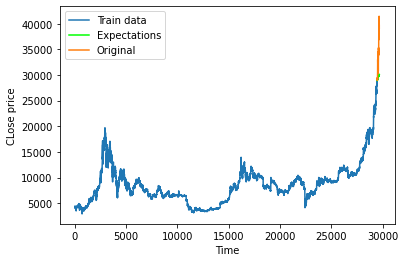

In [39]:
fig, ax = plt.subplots()
line1, = ax.plot(train_index, train_data,label="Train data")
line2, = ax.plot(check_index,AR,'lime',label="Expectations")
line3, = ax.plot(check_index,check_data,label="Original")
ax.set(xlabel='Time', ylabel='CLose price')
ax.legend()
plt.show()

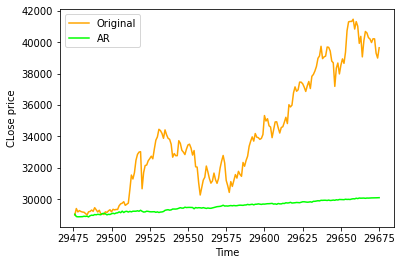

In [40]:
fig, ax = plt.subplots()
line1, = ax.plot(check_index,check_data,'orange',label="Original")
line2, = ax.plot(check_index,AR,'lime',label="AR")
ax.set(xlabel='Time', ylabel='CLose price')
ax.legend()
plt.show()

<h3 style="text-align:center">ARIMA</h3>

In [15]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
model = ARIMA(train_data, order=(number_of_predictions, 1, 1))
model_fit = model.fit()
arima = []
# make prediction

In [21]:
model = ARIMA(train_data, order=(50, 1, 1))
model_fit = model.fit()

In [75]:
arima = model_fit.predict(len(train_data), len(train_data)+number_of_predictions-1)


In [76]:
arima1_mistake = mistake_count(arima)

Delta in predictions vs real data 887467.7328951568
Accuracy =  4437.338664475784


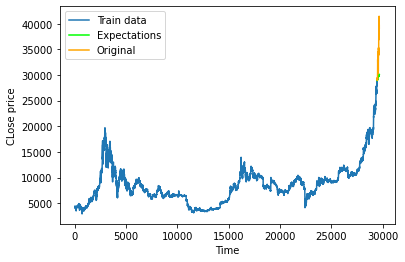

In [77]:
fig, ax = plt.subplots()
line1, = ax.plot(train_index, train_data,label="Train data")
line2, = ax.plot(check_index,arima,'lime',label="Expectations")
line3, = ax.plot(check_index,check_data,'orange',label="Original")
ax.set(xlabel='Time', ylabel='CLose price')
ax.legend()
plt.show()

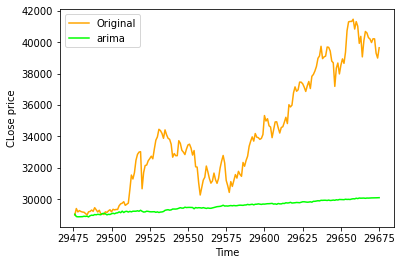

In [78]:
fig, ax = plt.subplots()
line1, = ax.plot(check_index,check_data,'orange',label="Original")
line2, = ax.plot(check_index,arima,'lime',label="arima")
ax.set(xlabel='Time', ylabel='CLose price')
ax.legend()
plt.show()

More accurate and long-learning ARIMA

In [ ]:
model = ARIMA(train_data, order=(number_of_predictions, number_of_predictions, 2))
model_fit = model.fit()
# make prediction
arima2 = []
for i in range(number_of_predictions):
    arima2.append(model_fit.predict(len(data)+i, len(data)+i))

In [ ]:
arima2_mistake = mistake_count(arima2)

In [ ]:
model = ARIMA(data, order=([x for x in range(1,number_of_predictions)], 2, [y for y in range(1,number_of_predictions)]))
model_fit = model.fit()
# make prediction[x for x in range(number_of_predictions)]
arima_L = []
arima_L.append(model_fit.predict(len(data)+i, len(data)+i))

In [ ]:
arima_l_mistake = mistake_count(arima_L)

In [ ]:
fig, ax = plt.subplots()
line1, = ax.plot(check_index,arima,'lime',label="IMA=1")
line2, = ax.plot(check_index,arima2,'darkgreen',label="IMA=2")
line3, = ax.plot(check_index,arima_L,'seagreen',label="AR = list, I = 2, MA=list")
line4, = ax.plot(check_index,check_data,'orange',label="Original")
ax.set(xlabel='Time', ylabel='CLose price')
ax.legend()
plt.show()

<h3 style="text-align:center">SimpleExpSmoothing</h3>

In [86]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [94]:
simpexp = []
model = SimpleExpSmoothing(train_data,initialization_method='heuristic')
model_fit = model.fit(smoothing_level=0.7,optimized=True,use_brute=True,method="bh")
#smoothing_level = max 2 working - futher will be nan; use_brute - for start vallues
#Method "bh" in doc listed as quickest
simpexp = model_fit.forecast(number_of_predictions)

In [95]:
simpexp_mistake = mistake_count(simpexp)

Delta in predictions vs real data 997094.4002350734
Accuracy =  4985.472001175367


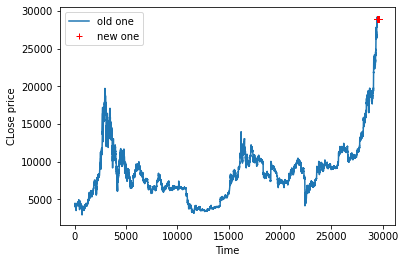

In [97]:
fig, ax = plt.subplots()
line1, = ax.plot(index, df["Close"],label="old one")
line2, = ax.plot(check_index,simpexp,'r+',label="new one")
ax.set(xlabel='Time', ylabel='CLose price')
ax.legend()
plt.show()

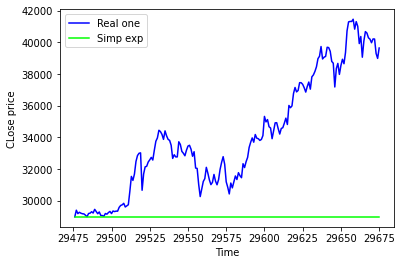

In [98]:
fig, ax = plt.subplots()
line1, = ax.plot(check_index,check_data,'blue',label="Real one")
line2, = ax.plot(check_index,simpexp,'lime',label="Simp exp")
ax.set(xlabel='Time', ylabel='CLose price')
ax.legend()
plt.show()

<h3 style="text-align:center">ExponentialSmoothing</h3>

In [99]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [100]:
model = ExponentialSmoothing(train_data,initialization_method='heuristic')
model_fit = model.fit(smoothing_level=0.7,optimized=True,use_brute=True,method="bh")
win_exp = model_fit.forecast(number_of_predictions)
# make prediction

e:\python\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [102]:
exp_smoth_mistake = mistake_count(win_exp)

Delta in predictions vs real data 997094.4002350734
Accuracy =  4985.472001175367


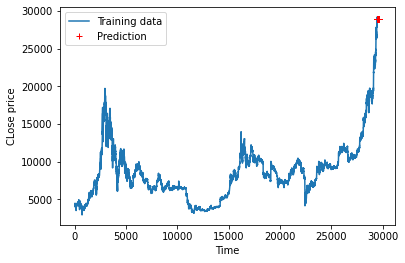

In [103]:
fig, ax = plt.subplots()
line1, = ax.plot(train_index,train_data,label="Training data")
line2, = ax.plot(check_index,win_exp,'r+',label="Prediction")
ax.set(xlabel='Time', ylabel='CLose price')
ax.legend()
plt.show()

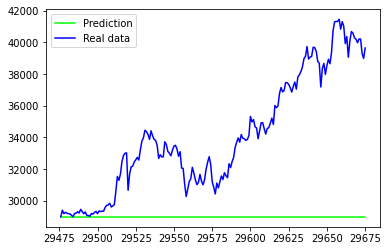

In [104]:
fig,ax = plt.subplots()
line, = ax.plot(check_index,win_exp,'lime',label="Prediction")
line2, = ax.plot(check_index,check_data,'blue',label="Real data")
ax.legend()
plt.show()

<h3 style="text-align:center">SARIMA</h3>

In [180]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [181]:
# define model configuration
my_order = (1, 1, 1)
my_seasonal_order = (1, 1, 1, 12)
# define model
model = SARIMAX(train_data, order=my_order, seasonal_order=my_seasonal_order)
model_fit = model.fit()
SARIMA = model_fit.forecast(number_of_predictions)

TypeError: predict() got multiple values for keyword argument 'start'

In [ ]:
sarima_mistake = mistake_count(SARIMA)

In [ ]:
fig, ax = plt.subplots()
line1, = ax.plot(train_index, train_data,label="Train data")
line2, = ax.plot(check_index,SARIMA,'r+',label="Prediction")
ax.set(xlabel='Time', ylabel='CLose price')
ax.legend()
plt.show()

In [ ]:
fig,ax = plt.subplots()
line, = ax.plot(check_index,SARIMA,'lime',label="Sarima prediction")
line2, = ax.plot(check_index,check_data,'orange',label="Original")
plt.show()

<h3 style="text-align:center">Results</h3>

NameError: name 'SARIMA' is not defined

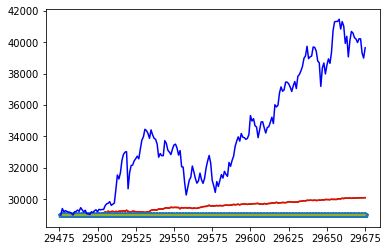

In [106]:
fig, ax = plt.subplots()
line1, = ax.plot(check_index,AR,'darkgreen',label="AR")
line2, = ax.plot(check_index,arima,'r',label="ARIMA")
line3, = ax.plot(check_index,simpexp,'p',label="SES")
line4, = ax.plot(check_index,win_exp,'y',label="HWES")
line6, = ax.plot(check_index,check_data,'blue',label="ORIGINAL")
line5, = ax.plot(check_index,SARIMA,'lime',label="SARIMA")
ax.set(xlabel='Time', ylabel='CLose price')
ax.legend()
plt.show()

<h2 style="text-align:center">Accuracy</h2>

In [ ]:
#accuracy = summ/pbservations
accuracy = [sarima_mistake,exp_smoth_mistake,simpexp_mistake,arima1_mistake,ar_mistake,arima2_mistake]
print(min(accuracy))